In [2]:
data_path = 'datasets/antidepressant-study/'

In [3]:
import pyedflib
import numpy as np
import pandas as pd
import mne
from pydmd import DMD


In [4]:
def edf_to_arr(edf_path):
    f = pyedflib.EdfReader(edf_path)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)

    return sigbufs

In [ ]:
broken_files = 

In [23]:
#preprocessing function for the python script
from scipy.signal import detrend
from sklearn.preprocessing import StandardScaler
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt



#takes eeg data as 2d array nchannels x ntimepoints
def preprocessing(eeg_data, lowcut=4, highcut=45, samplingrate= 250, order=4, ):
  #detrend first
  eeg_detrended = detrend(eeg_data, axis=-1, type='linear')
  #bandpass filter as griffith did
  b, a = butter(order, [lowcut / (0.5 * samplingrate), highcut / (0.5 * samplingrate)], btype='band')
  eeg_bandfiltered = filtfilt(b, a, eeg_detrended, axis=-1)
  #standardize
  eeg_normalized = StandardScaler().fit_transform(eeg_bandfiltered.T).T
  return eeg_normalized


In [14]:
test_arr = edf_to_arr(data_path + 'DD01S1EC-edf.edf')
test_arr

array([[ -8.2137139 , -12.09207567, -14.80979197, ...,  -3.86845113,
         -3.86845113,  -3.86845113],
       [  2.33158316,  -1.93772612,  -5.35115376, ...,  -7.6032081 ,
         -7.6032081 ,  -7.6032081 ],
       [  2.37042204,  -0.36973329,  -1.80362279, ...,   0.72257521,
          0.72257521,   0.72257521],
       ...,
       [  7.00555132,   5.71739506,   3.6169313 , ..., -46.99607415,
        -46.99607415, -46.99607415],
       [ -4.01718981,  -5.68536134,  -7.0160191 , ..., -15.5857654 ,
        -15.5857654 , -15.5857654 ],
       [-15.37876182, -16.13512788, -12.9379481 , ...,   3.12563164,
          3.12563164,   3.12563164]], shape=(35, 95744))

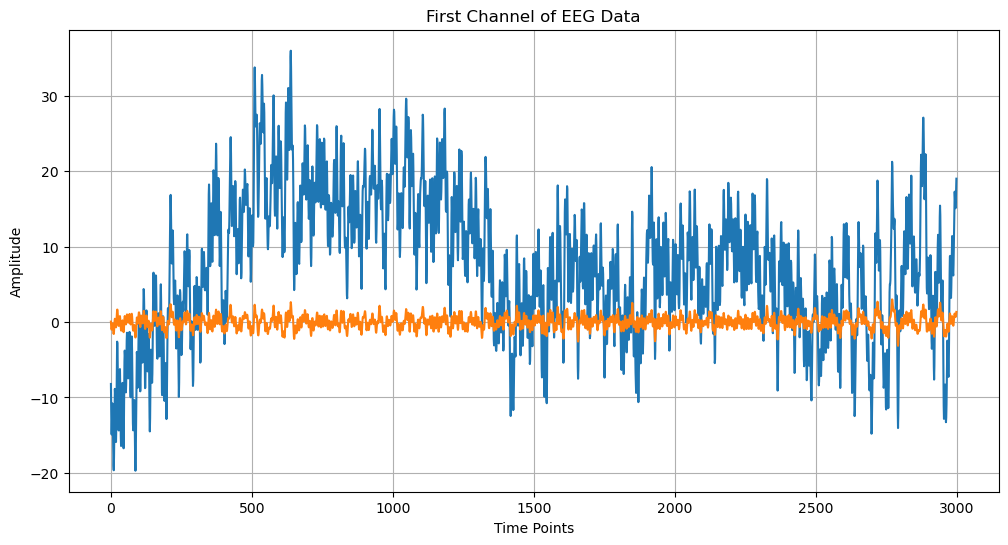

In [27]:
test_arr_clean = preprocessing(test_arr)

plt.figure(figsize=(12, 6))
plt.plot(test_arr[0, :3000])
plt.plot(test_arr_clean[0, :3000])

plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.title('First Channel of EEG Data')
plt.grid(True)
plt.show()

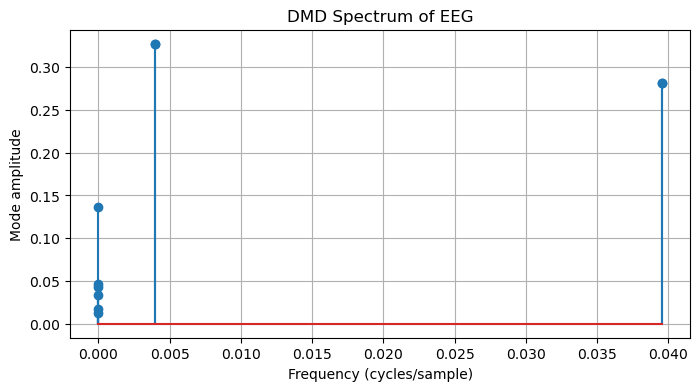

[[ 6.27132289e-02 -6.26351859e-01 -1.00454665e+00 ...  7.11480433e-05
   7.12597593e-05  7.13066102e-05]
 [ 3.53102901e-02 -7.59450196e-01 -1.22100713e+00 ...  8.55711553e-05
   8.56620823e-05  8.57127990e-05]
 [ 7.51734000e-02 -3.92107082e-01 -6.50170307e-01 ...  4.28612006e-05
   4.29431450e-05  4.29675693e-05]
 ...
 [-7.49785151e-03 -7.26990878e-01 -1.21409751e+00 ...  5.73576598e-05
   5.75316508e-05  5.77385686e-05]
 [-2.15520856e-02 -6.73910899e-01 -1.13671643e+00 ...  6.32474197e-05
   6.33875202e-05  6.35093279e-05]
 [-1.38737410e-01  1.17514318e-02  2.70201470e-01 ... -6.45368616e-05
  -6.43383551e-05 -6.40883574e-05]]


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load EEG data (shape: channels x time, so per participant)
# Example simulated EEG data (replace with your own)
n_channels = 64
n_timepoints = 1000000
eeg_data = test_arr_clean

# Step 2: Apply DMD (you can transpose depending on dimensionality preference)
dmd = DMD(svd_rank=10)  # svd_rank = number of modes to keep
dmd.fit(eeg_data)

# Step 3: Output details
eigenvalues = dmd.eigs         # Complex frequencies of modes
dmd_modes = dmd.modes          # Each column = spatial mode (shape: channels x modes)
dmd_amplitudes = dmd.amplitudes #Initial weights (importance) of each mode
dmd_dynamics = dmd.dynamics    # Temporal evolution of each mode

# Step 4: Visualize frequency spectrum (from eigenvalues)
frequencies = np.abs(np.angle(eigenvalues)) / (2 * np.pi)  # In cycles/sample

plt.figure(figsize=(8, 4))
plt.stem(frequencies, np.abs(dmd_amplitudes))
plt.xlabel("Frequency (cycles/sample)")
plt.ylabel("Mode amplitude")
plt.title("DMD Spectrum of EEG")
plt.grid(True)
plt.show()

# Step 5 (Optional): Reconstruct signal from DMD modes
reconstructed = dmd.reconstructed_data.real
print(eeg_data)

In [29]:
eigenvalues = dmd.eigs         # Complex frequencies of modes
dmd_modes = dmd.modes          # Each column = spatial mode (shape: channels x modes)
dmd_amplitudes = dmd.amplitudes
dmd_dynamics = dmd.dynamics    # Temporal evolution of each mode


In [30]:
import pandas as pd
df = pd.DataFrame(dmd_modes)
df

,0,1,2,3,4,5,6,7,8,9
0,-0.195511-0.034372j,-0.195511+0.034372j,-0.053165+0.000000j,-0.238613+0.001120j,-0.238613-0.001120j,0.109642+0.000000j,-0.019781+0.000000j,-0.026367+0.000000j,-0.120373+0.000000j,-0.102781+0.000000j
1,-0.204849-0.037899j,-0.204849+0.037899j,-0.054569+0.000000j,-0.206898+0.023032j,-0.206898-0.023032j,0.197430+0.000000j,0.093653+0.000000j,-0.150971+0.000000j,-0.104701+0.000000j,0.000858+0.000000j
2,-0.211768-0.015925j,-0.211768+0.015925j,-0.055114+0.000000j,-0.231540+0.032218j,-0.231540-0.032218j,0.015680+0.000000j,-0.041856+0.000000j,0.051897+0.000000j,-0.147186+0.000000j,-0.115235+0.000000j
3,-0.209693-0.012514j,-0.209693+0.012514j,-0.084396+0.000000j,-0.170674+0.106754j,-0.170674-0.106754j,0.229709+0.000000j,0.171431+0.000000j,-0.188974+0.000000j,-0.101751+0.000000j,-0.013539+0.000000j
4,-0.138283+0.037966j,-0.138283-0.037966j,-0.086431+0.000000j,-0.051231+0.019048j,-0.051231-0.019048j,-0.261040+0.000000j,0.018610+0.000000j,0.151729+0.000000j,-0.102625+0.000000j,-0.063149+0.000000j
5,0.281591+0.068410j,0.281591-0.068410j,-0.081063+0.000000j,0.026594+0.084041j,0.026594-0.084041j,0.077761+0.000000j,0.117241+0.000000j,-0.106038+0.000000j,-0.045646+0.000000j,0.015450+0.000000j
6,-0.052196-0.022904j,-0.052196+0.022904j,-0.034439+0.000000j,0.218195-0.035527j,0.218195+0.035527j,-0.311756+0.000000j,0.104512+0.000000j,0.113135+0.000000j,0.086283+0.000000j,-0.087401+0.000000j
7,-0.069050+0.048592j,-0.069050-0.048592j,0.092699+0.000000j,0.241587+0.074841j,0.241587-0.074841j,-0.013631+0.000000j,-0.161621+0.000000j,-0.004602+0.000000j,0.059715+0.000000j,0.050313+0.000000j
8,0.039658-0.144898j,0.039658+0.144898j,0.175184+0.000000j,0.147207-0.131052j,0.147207+0.131052j,-0.167636+0.000000j,0.042402+0.000000j,0.027964+0.000000j,0.207925+0.000000j,-0.047075+0.000000j
9,-0.079970+0.019658j,-0.079970-0.019658j,0.634160+0.000000j,0.080376-0.061195j,0.080376+0.061195j,0.017956+0.000000j,-0.413540+0.000000j,-0.031092+0.000000j,0.156468+0.000000j,0.105760+0.000000j


In [31]:
damping_ratios = -np.real(dmd.eigs) / np.sqrt(np.real(dmd.eigs)**2 + np.imag(dmd.eigs)**2)
frequencies = np.abs(np.angle(eigenvalues)) / (2 * np.pi)  # In cycles/sample
print(damping_ratios)
print(frequencies)

[-0.96925662 -0.96925662 -1.         -0.99969203 -0.99969203 -1.
 -1.         -1.         -1.         -1.        ]
[0.03956671 0.03956671 0.         0.00395005 0.00395005 0.
 0.         0.         0.         0.        ]


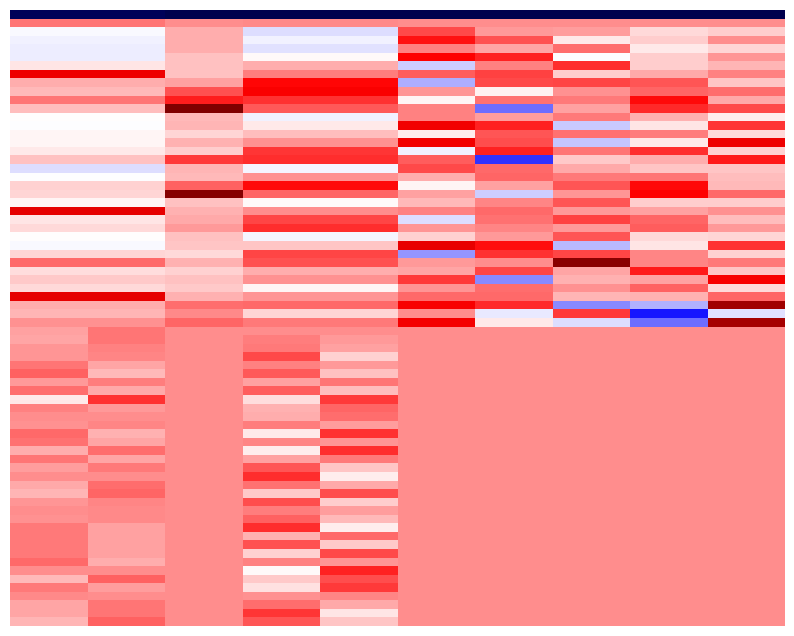

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace these with your actual data)
Phi_phys_unique_norm_real = np.real(dmd.modes)  # Real part of normalized DMD modes
Phi_phys_unique_norm_imag = np.imag(dmd_modes)  # Imaginary part of normalized DMD modes
zeta_map = damping_ratios  # Normalized damping ratios
fn_map = frequencies    # Normalized frequencies

# Combine data for heatmap
heatmap_data = np.vstack([
    zeta_map,
    fn_map,
    Phi_phys_unique_norm_real,
    Phi_phys_unique_norm_imag
])

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='seismic', cbar=False, xticklabels=False, yticklabels=False)

# Save the figure
output_filename = 'heatmap_test.png'  # Replace `subject` and `trial` with actual values
plt.savefig(output_filename, bbox_inches='tight')
plt.show()

In [37]:
pd.DataFrame(heatmap_data)[60:70][:]

,0,1,2,3,4,5,6,7,8,9
60,0.020367,0.020367,-0.117946,-0.199817,-0.073857,-0.073857,-0.046561,-0.046561,-0.036284,-0.036284
61,-0.060541,-0.060541,-0.030389,0.019682,0.190431,0.190431,-0.060248,-0.060248,-0.157591,-0.157591
62,0.070415,0.070415,0.088974,0.159092,-0.144485,-0.144485,0.191925,0.191925,0.180482,0.180482
63,-0.034684,-0.034684,0.142240,0.191002,0.151122,0.151122,-0.118506,-0.118506,-0.120688,-0.120688
64,-0.054466,0.054466,0.000000,0.000000,0.047402,-0.047402,-0.114976,0.114976,-0.091664,0.091664
65,-0.021079,0.021079,0.000000,0.000000,0.094080,-0.094080,-0.016572,0.016572,0.012028,-0.012028
66,0.042218,-0.042218,0.000000,0.000000,-0.092326,0.092326,0.105503,-0.105503,0.066708,-0.066708
67,-0.004759,0.004759,0.000000,0.000000,-0.016415,0.016415,-0.070947,0.070947,0.061576,-0.061576
68,-0.006399,0.006399,0.000000,0.000000,0.016454,-0.016454,-0.004587,0.004587,0.139175,-0.139175
69,0.070938,-0.070938,0.000000,0.000000,-0.065014,0.065014,0.061876,-0.061876,0.107221,-0.107221
